<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/08_6_ResNet_ResNeXt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 643.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfu

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [4]:
print("hello")

hello


## **Residual Networks**

Nested function classes ensure that increasing network complexity improves performance, unlike non-nested classes. Residual networks (ResNet) leverage this concept by enabling added layers to maintain identity mappings, which facilitates training deeper networks effectively. ResNet's residual blocks have profoundly impacted various neural network architectures.

## **Residual Blocks**

1. Residual Block Concept:

 - Regular block (left): Learns the direct mapping
𝑓
(
𝑥
) for the input
𝑥.
 - Residual block (right): Learns the residual mapping
𝑔
(
𝑥
)
=
𝑓
(
𝑥
)
−
𝑥, where
𝑓
(
𝑥
) is the desired mapping.
 - If
𝑓
(
𝑥
)
=
𝑥 (identity mapping), then
𝑔
(
𝑥
)
= 0. This simplifies learning since the weights and biases can be pushed to zero.

2. Residual Connections:

 - The shortcut connection (solid line) bypasses the weight layers and directly propagates the input
𝑥 to the addition operator.
 - This speeds up forward propagation and reduces learning complexity.

3. Design of Residual Blocks:

 - Each block contains two
3
×
3 convolutional layers, followed by batch normalization and ReLU activation functions.
 - The input is added to the output of these layers just before the final ReLU activation.

4. Shape Compatibility:

 - For the addition operation, the input and the output of the convolutional layers must have the same shape.
 - If the number of channels changes, a
1
×
1 convolutional layer is used to transform the input to the required shape.

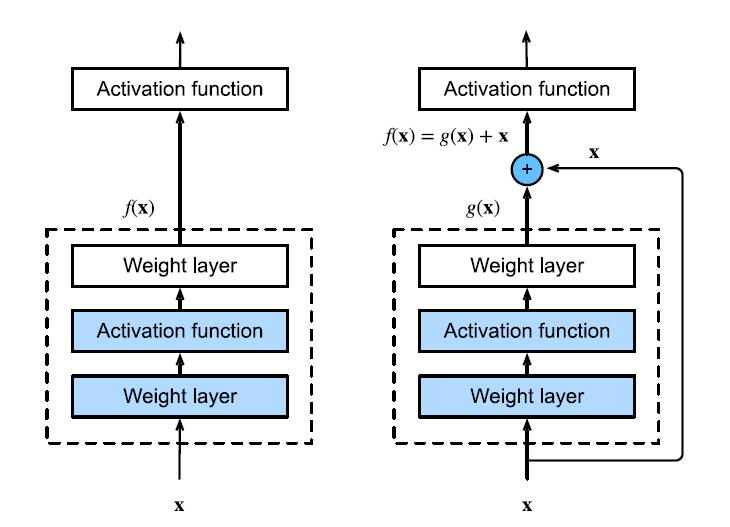